## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
Please download the dataset from the below url

In [1]:
# import the libraries as shown below
import tensorflow
from tensorflow.python.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.python.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

c:\users\amit upadhyay\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\amit upadhyay\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\amit upadhyay\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\amit upadhyay\anaconda3\envs\myenv\lib\s

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders

NameError: name 'folders' is not defined

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================]2/2 [==============================] - 271s 136s/step - loss: 1.2425 - acc: 0.3281 - val_loss: 1.0877 - val_acc: 0.3276

Epoch 2/50
2/2 [==============================]2/2 [==============================] - 328s 164s/step - loss: 1.0261 - acc: 0.5156 - val_loss: 1.1237 - val_acc: 0.3276

Epoch 3/50
2/2 [==============================]2/2 [==============================] - 240s 120s/step - loss: 0.8051 - acc: 0.6250 - val_loss: 1.1753 - val_acc: 0.3276

Epoch 4/50
2/2 [==============================]2/2 [==============================] - 207s 104s/step - loss: 0.7037 - acc: 0.6875 - val_loss: 1.2420 - val_acc: 0.3276

Epoch 5/50
2/2 [==============================]2/2 [==============================] - 196s 98s/step - loss: 0.5907 - acc: 0.8125 - val_loss: 1.3161 - val_acc: 0.3276

Epoch 6/50
2/2 [==============================]2/2 [==============================] - 193s 97s/step - loss: 0.5612 - acc: 0.7969 - val_loss: 1.3741 - val_acc: 0.


Epoch 50/50
2/2 [==============================]2/2 [==============================] - 197s 98s/step - loss: 0.0394 - acc: 1.0000 - val_loss: 1.6083 - val_acc: 0.3276



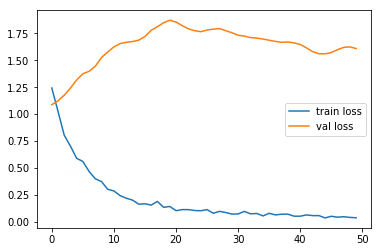

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.python.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:

y_pred = model.predict(test_set)


TypeError: Error when checking model : data should be a Numpy array, or list/dict of Numpy arrays. Found: <tensorflow.python.keras._impl.keras.preprocessing.image.DirectoryIterator object at 0x000001BA00658630>...

In [21]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1